## Env Setup

In [1]:
!pip install mne


In [2]:
import os
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.datasets import eegbci
mne.__version__

'0.23.0'

## Get Data

In [3]:
data_dir = "data"
subjects = [0]
runs = range(1, 15)#[3, 4, 7, 8, 11, 12]

raw_fnames = {}
for i, d in enumerate(os.listdir(data_dir)):
    if os.path.isdir(os.path.join(data_dir, d)) and i in subjects:
        raw_fnames[d] = os.listdir(os.path.join(data_dir, d))

dataset = []
for d in raw_fnames:
    subject = []
    for i, f in enumerate(raw_fnames[d]):
        if f.endswith(".edf") and int(f.split('R')[1].split(".")[0]) in runs:
            subject.append(mne.io.read_raw_edf(os.path.join(data_dir, d, f), preload=True))
    dataset.append(mne.concatenate_raws(subject))

Extracting EDF parameters from C:\Users\Rock_\Desktop\Projects\Total_perspective_vortex\data\S1\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\Rock_\Desktop\Projects\Total_perspective_vortex\data\S1\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from C:\Users\Rock_\Desktop\Projects\Total_perspective_vortex\data\S1\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Rock_\Desktop\Projects\Total_perspective_vortex\data\S1\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Ex

In [4]:
subject = 0
print(dataset[subject])
print(dataset[subject].info)
print(dataset[subject].info["ch_names"])
sfreq = dataset[subject].info["sfreq"]
# events
print(dataset[subject].annotations[subject])

<RawEDF | S001R01.edf, 64 x 259520 (1622.0 s), ~126.8 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
OrderedDict([('onset', 0.0), ('duration', 60.2), ('description', 'T0'), ('orig_time', datetime.datetime(2009, 8, 12, 16, 15, tzinfo=datetime.timezone.u

In [5]:
# remove dots from channel's names
for j, elem in enumerate(dataset):
    dataset[j].rename_channels(lambda s: s.strip("."))

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<IPython.core.display.Javascript object>


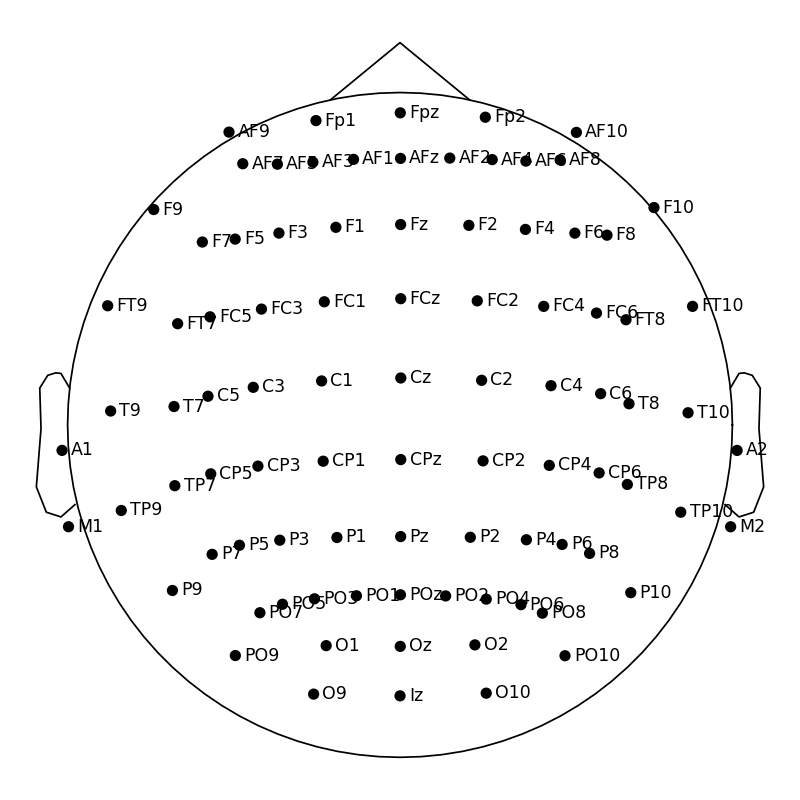

<IPython.core.display.Javascript object>


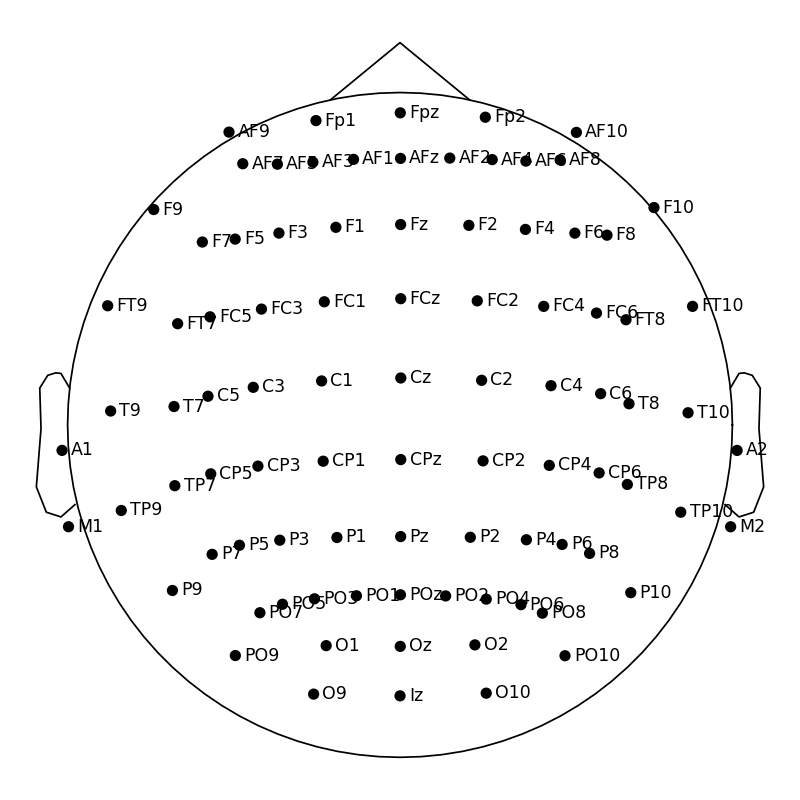

In [6]:
# plot montage
montage = mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [7]:
# set montage
for j, subject in enumerate(dataset):
    eegbci.standardize(dataset[j])  # set channel names
    dataset[j].set_montage(montage)

In [8]:
# re-referencing
#for j, subject in enumerate(dataset):
#    dataset[j].set_eeg_reference("average")

<IPython.core.display.Javascript object>


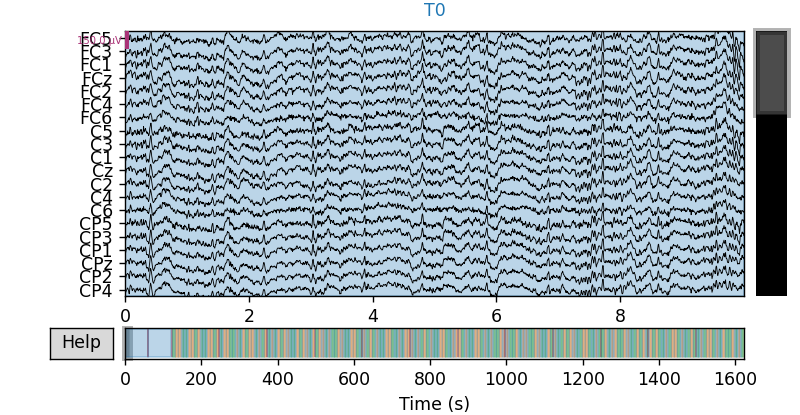

<IPython.core.display.Javascript object>


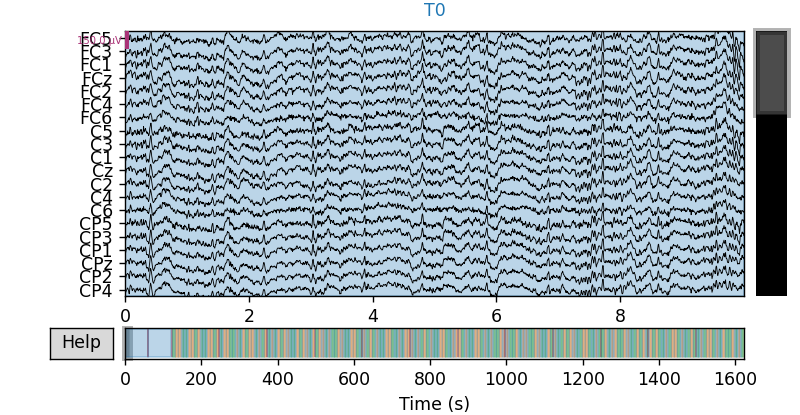

In [9]:
# plot data
mne.viz.plot_raw(dataset[0], scalings={"eeg": 75e-6})

## Filter

In [10]:
# FirWin filter
filtered_dataset = []
for subject in dataset:
    elem_tmp = subject.copy()
    # set montage again since its is not copyed
    elem_tmp.set_montage(montage)
    elem_tmp.filter(7, 30, fir_design='firwin')
    filtered_dataset.append(elem_tmp)

Filtering raw data in 14 contiguous segments
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 sec)



<IPython.core.display.Javascript object>


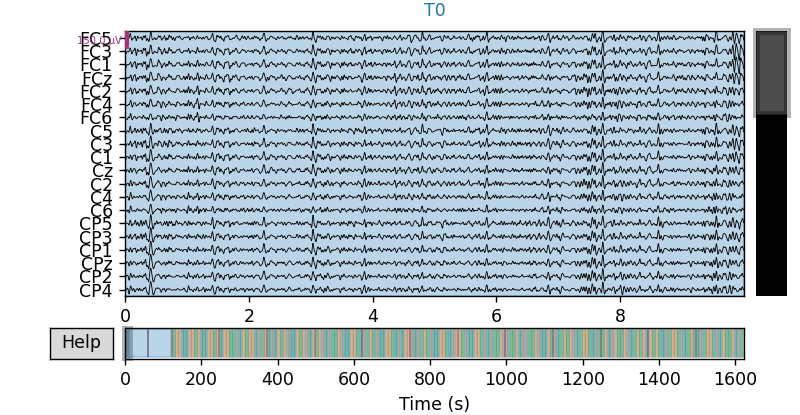

<IPython.core.display.Javascript object>


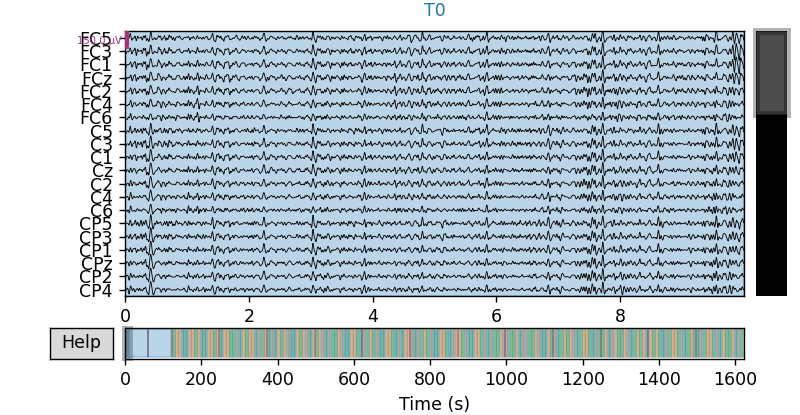

In [11]:
# plot data
mne.viz.plot_raw(filtered_dataset[0], scalings={"eeg": 75e-6})

## Set Labels

In [12]:
event_id = dict(T1=1, T2=2)
# avoid classification of evoked responses by using epochs that start 1s after cue onset.
tmin, tmax = -1., 4.
# parse data for MNE
labels_dataset = []
epochs_dataset = []
for subject in filtered_dataset:
    events, _ = mne.events_from_annotations(subject, event_id=event_id)
    picks = mne.pick_types(subject.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')
    epochs = mne.Epochs(subject, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)   
    labels = epochs.events[:, -1] - 1
    labels_dataset.append(labels)
    epochs_dataset.append(epochs)

epochs_dataset[0]
labels_dataset[0]

Used Annotations descriptions: ['T1', 'T2']
Not setting metadata
Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated
Loading data for 180 events and 801 original time points ...
0 bad epochs dropped


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1])

## PCA

## ICA 

## Pipeline

In [13]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

Computing rank from data with rank=None
    Using tolerance 0.00046 (2.2e-16 eps * 64 dim * 3.2e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00045 (2.2e-16 eps * 64 dim * 3.2e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00044 (2.2e-16 eps * 64 dim * 3.1e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00047 (2.2e-16 eps * 64 dim * 3.3e+10  max singular value)


<IPython.core.display.Javascript object>


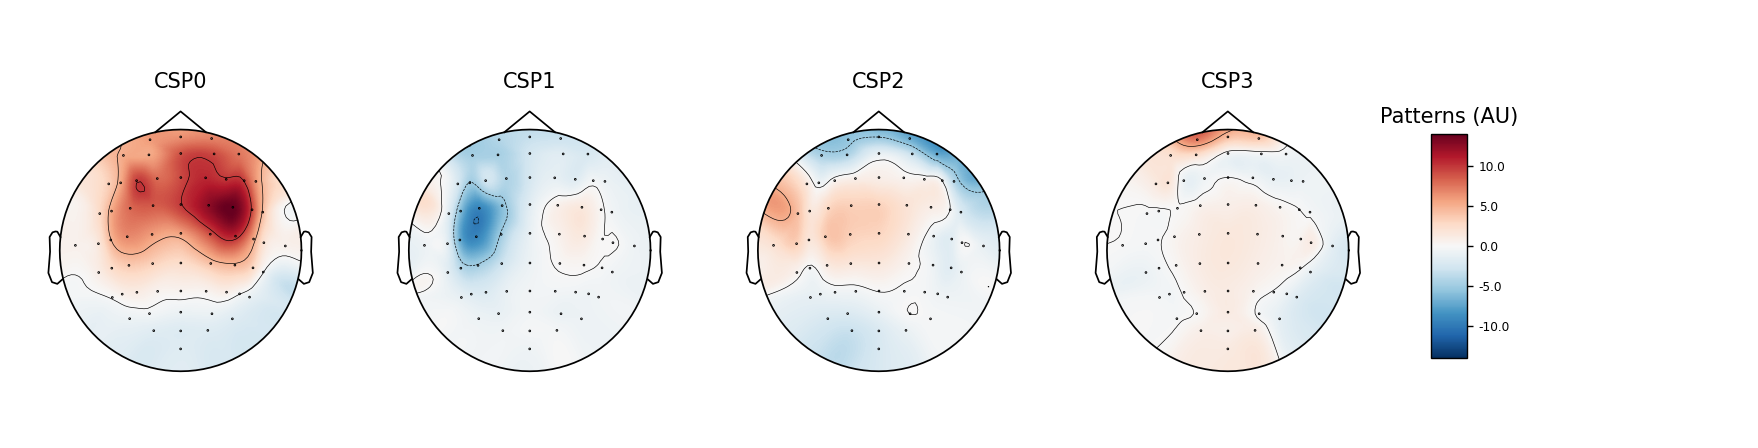

<IPython.core.display.Javascript object>


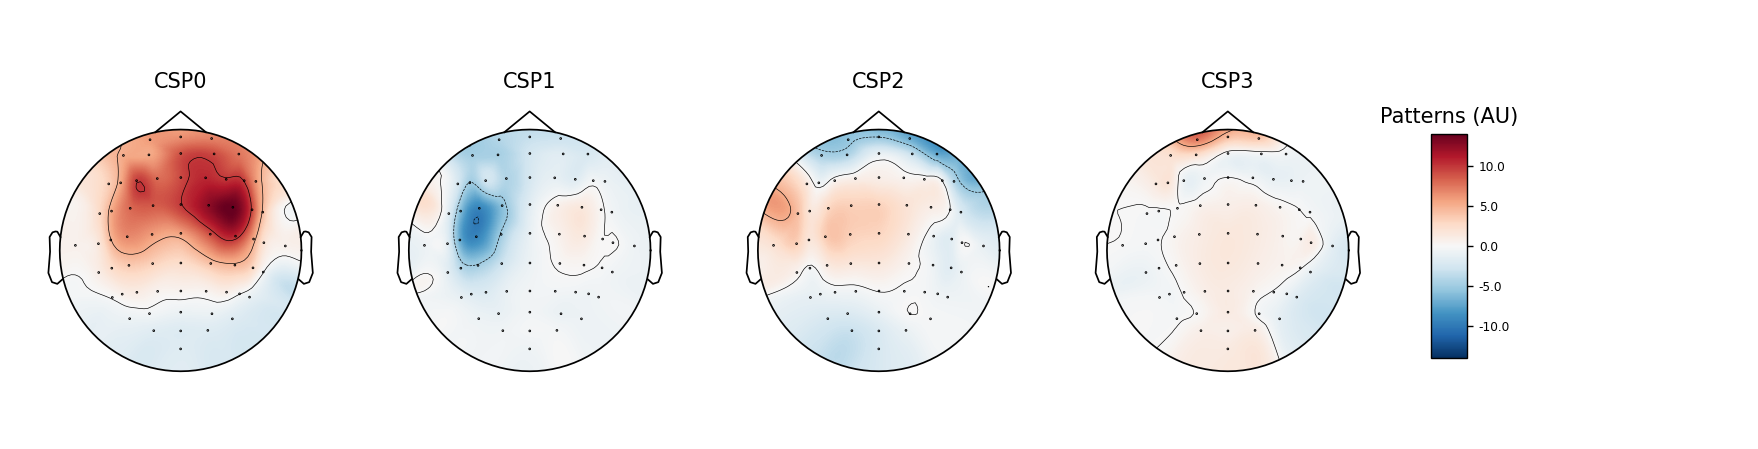

In [14]:
subject = 0
labels = labels_dataset[subject]
epochs = epochs_dataset[subject]

# Define a monte-carlo cross-validation generator (reduce variance):
epochs_data = epochs.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([('CSP', csp), ('LDA', lda)])
scores = cross_val_score(clf, epochs_data, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == 0)
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)

## Classification

Computing rank from data with rank=None
    Using tolerance 0.00046 (2.2e-16 eps * 64 dim * 3.2e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00045 (2.2e-16 eps * 64 dim * 3.2e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00044 (2.2e-16 eps * 64 dim * 3.1e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00047 (2.2e-16 eps * 64 dim * 3.3e+10  max singular value)


<IPython.core.display.Javascript object>


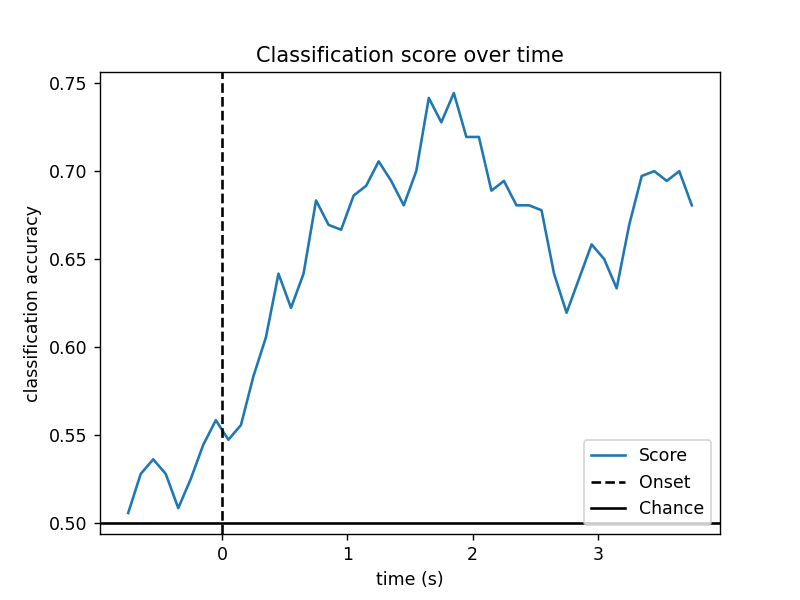

In [15]:
w_length = int(sfreq * 0.5)   # running classifier: window length
w_step = int(sfreq * 0.1)  # running classifier: window step size
w_start = np.arange(0, epochs_data.shape[2] - w_length, w_step)

scores_windows = []

for train_idx, test_idx in cv_split:
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(epochs_data[train_idx], y_train)
    X_test = csp.transform(epochs_data[test_idx])

    # fit classifier
    lda.fit(X_train, y_train)

    # running classifier: test classifier on sliding window
    score_this_window = []
    for n in w_start:
        X_test = csp.transform(epochs_data[test_idx][:, :, n:(n + w_length)])
        score_this_window.append(lda.score(X_test, y_test))
    scores_windows.append(score_this_window)

# Plot scores over time
w_times = (w_start + w_length / 2.) / sfreq + epochs.tmin

plt.figure()
plt.plot(w_times, np.mean(scores_windows, 0), label='Score')
plt.axvline(0, linestyle='--', color='k', label='Onset')
plt.axhline(0.5, linestyle='-', color='k', label='Chance')
plt.xlabel('time (s)')
plt.ylabel('classification accuracy')
plt.title('Classification score over time')
plt.legend(loc='lower right')
plt.show()